<a href="https://colab.research.google.com/github/RenanSoaresMP/An-lises-Descritivas/blob/main/Projeto_An%C3%A1lises_Descritivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos_de_Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [3]:
dados.Renda.min()

0

In [4]:
dados.Renda.max()

200000

In [5]:
SM = 788
classes = [dados.Renda.min(), 2*SM, 5*SM, 15*SM, 25*SM, dados.Renda.max()]
labels = ['E', 'D', 'C', 'B', 'A']

In [6]:
pd.cut(x=dados.Renda, bins=classes, labels=labels, include_lowest = True)

0        E
1        E
2        E
3        D
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [7]:
frequencia = pd.value_counts(
    pd.cut(x=dados.Renda, bins=classes, labels=labels, include_lowest = True)
)

percentual = pd.value_counts(
    pd.cut(x=dados.Renda, bins=classes, labels=labels, include_lowest = True), normalize = True
)*100

In [8]:
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

In [9]:
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

In [10]:
tabela1 = pd.DataFrame({'Frequência': frequencia, 'Percentual(%)': percentual})
tabela1.rename_axis('Classes', axis=1, inplace = True)
tabela1

Classes,Frequência,Percentual(%)
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


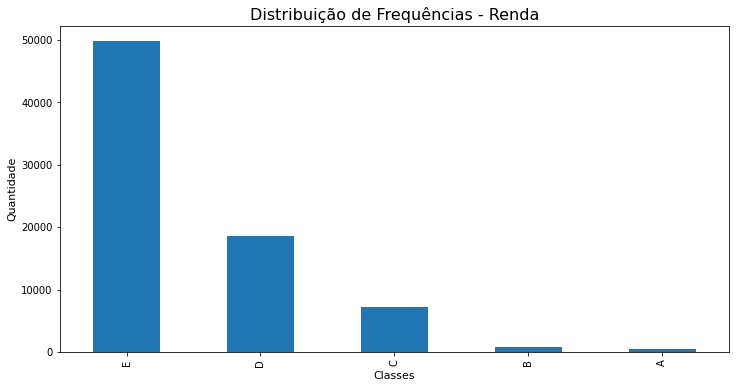

In [11]:
ax1 = tabela1['Frequência'].plot.bar()
ax1.figure.set_size_inches(12, 6)
ax1.set_xlabel('Classes', fontsize=11)
ax1.set_ylabel('Quantidade', fontsize=11)
ax1.set_title('Distribuição de Frequências - Renda', fontsize=16)
ax1

Conclui-se analisando o gráfico da distribuição de renda no Brasil, que a grande maioria da população brasileira está compreendisa nas classes D e E, e uma pequena parcela está nas classes mais favorecidas, evidenciando uma grande desigualdade social.

In [12]:
tabela1.sort_index(ascending=False)  #para inverter os valores no gráfico

Classes,Frequência,Percentual(%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


#Histogramas de variáveis quantitativas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


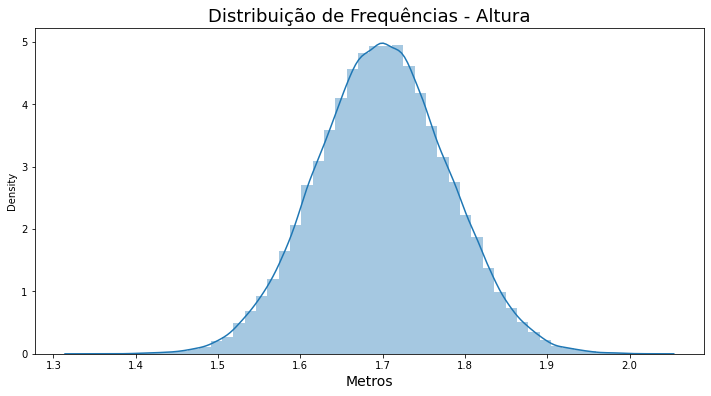

In [13]:
#Usando .displot()
hist1 = sns.distplot(dados.Altura)
hist1.figure.set_size_inches(12, 6)
hist1.set_title('Distribuição de Frequências - Altura', fontsize=18)
hist1.set_xlabel('Metros', fontsize=14)
hist1

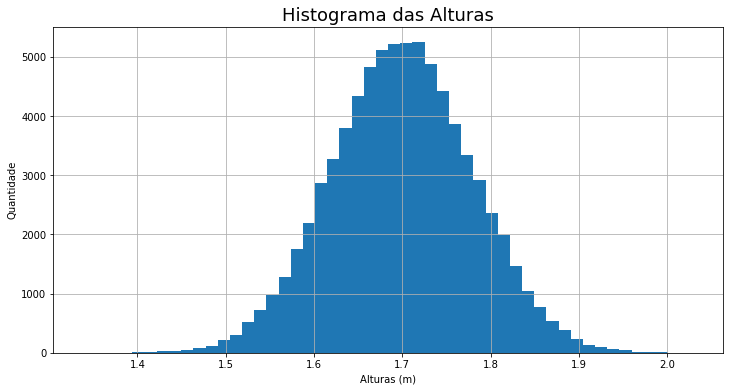

In [14]:
#Usando hist()
hist2 = dados.Altura.hist(bins = 50, figsize=(12,6))
plt.xlabel('Alturas (m)')
plt.ylabel('Quantidade')
plt.title('Histograma das Alturas', fontsize=18)
plt.grid(True)
plt.show()

A maior concentração das alturas está entre 1,6 e 1,8m.

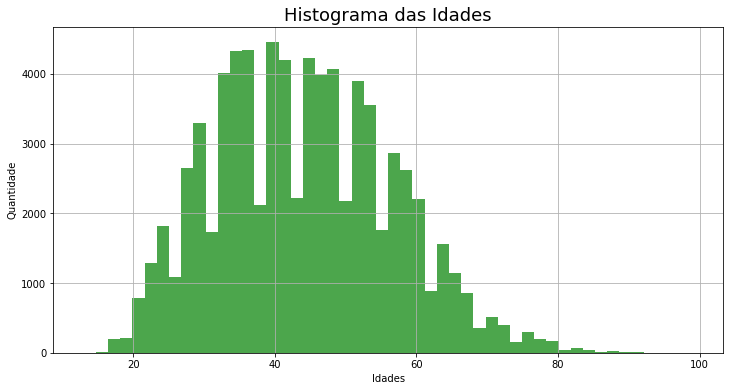

In [15]:
hist3 = dados.Idade.hist(bins = 50, facecolor='g', alpha=0.7, figsize=(12,6))
plt.xlabel('Idades')
plt.ylabel('Quantidade')
plt.title('Histograma das Idades', fontsize=18)
plt.grid(True)
plt.show()

Podemos notar uma queda acentuada da população após os 60 anos de idade. E uma grande concentração entre os 30 e 50.

##Histograma da Renda até R$20.000,00



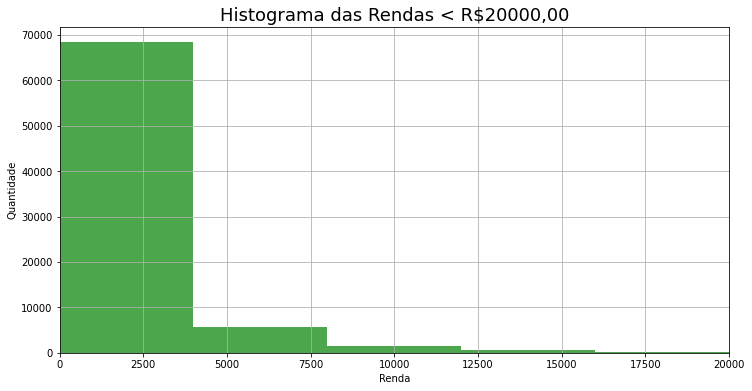

In [16]:
hist3 = dados.Renda.hist(bins = 50, facecolor='g', alpha=0.7, figsize=(12,6))
plt.xlabel('Renda')
plt.ylabel('Quantidade')
plt.title('Histograma das Rendas < R$20000,00', fontsize=18)
plt.xlim(0, 20000)
plt.grid(True)
plt.show()

##Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR

In [17]:
sexo = {0 : 'Masculino', 1 : 'Feminino'}
cor = {0 : 'Indígena', 2 : 'Branca', 4 : 'Preta', 6 : 'Amarela', 8 : 'Parda', 9 : 'Sem declaração'}

In [18]:
sexo_e_cor = pd.crosstab(dados.Sexo, dados.Cor, normalize = True)*100
sexo_e_cor.rename(index = sexo, inplace = True)
sexo_e_cor.rename(columns = cor, inplace = True)
sexo_e_cor


Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


Podemos notar que maioria da população brasileira se considera branca ou parda.

#Média dos salários entre sexos e cores

In [19]:
sexo_e_cor_renda = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = 'mean', values= dados.Renda)
sexo_e_cor_renda.rename(index = sexo, inplace = True)
sexo_e_cor_renda.rename(columns = cor, inplace = True)
sexo_e_cor_renda

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


#Percentual de pessoas que ganham um salário mínimo (R$788) ou menos



In [20]:
# Utilizei a função .percentileofscore do scipy

from scipy import stats
stats.percentileofscore(dados.Renda, 788, kind = 'weak')

28.86777719937533

## Análise descritiva - Renda

In [21]:
media_renda = dados.Renda.mean()
mediana_renda = dados.Renda.median()
moda_renda = dados.Renda.mode()
desviom_renda = dados.Renda.mad()
var_renda = dados.Renda.var()
desviop_renda = dados.Renda.std()

In [22]:
dados.Renda.describe().round(2)

count     76840.00
mean       2000.38
std        3323.39
min           0.00
25%         788.00
50%        1200.00
75%        2000.00
max      200000.00
Name: Renda, dtype: float64

In [23]:
dados.Renda.aggregate(['min','max','var','mean']).round(2)

min            0.00
max       200000.00
var     11044906.01
mean        2000.38
Name: Renda, dtype: float64

In [24]:
d = {'Media': [media_renda], 'Mediana': [mediana_renda],  'Desvio Padrão' : [desviom_renda]}
df = pd.DataFrame(data=d)
df

,Media,Mediana,Desvio Padrão
0,2000.383199,1200.0,1526.495137


#Obtenção da Mediana e valor máximo para a Renda, seguundo sexo e cor

In [25]:
#Mediana
sexo_e_cor_renda_med = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = { 'median'}, values= dados.Renda)
sexo_e_cor_renda_med.rename(index = sexo, inplace = True)
sexo_e_cor_renda_med.rename(columns = cor, inplace = True)
sexo_e_cor_renda_med

median                                
Cor       Indígena  Branca   Preta Amarela   Parda
Sexo                                              
Masculino    797.5  1700.0  1200.0  2800.0  1200.0
Feminino     788.0  1200.0   800.0  1500.0   800.0

In [26]:
#Máximo
sexo_e_cor_renda_max = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = {'max'}, values= dados.Renda)
sexo_e_cor_renda_max.rename(index = sexo, inplace = True)
sexo_e_cor_renda_max.rename(columns = cor, inplace = True)
sexo_e_cor_renda_max

max                               
Cor       Indígena  Branca  Preta Amarela   Parda
Sexo                                             
Masculino    10000  200000  50000   50000  100000
Feminino    120000  100000  23000   20000   30000

Analisando as rendas máxmas por sexo e cor, observando que, excluindo-se os indígenas, uma superioridade nas rendas dos homens em relação às mulheres.

#Medidas de dispersão - Obtenção do Desvio Padrão

In [27]:
#Desvio Padrão
sexo_e_cor_renda_std = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = {'std'}, values= dados.Renda)
sexo_e_cor_renda_std.rename(index = sexo, inplace = True)
sexo_e_cor_renda_std.rename(columns = cor, inplace = True)
sexo_e_cor_renda_std

std                                                   
Cor            Indígena       Branca        Preta     Amarela        Parda
Sexo                                                                      
Masculino   1204.093490  4750.791872  1936.309271  5740.82482  2312.087184
Feminino   11957.498292  3251.013154  1349.799809  3731.17366  1596.233048

#Box plot da renda, segundo sexo e cor

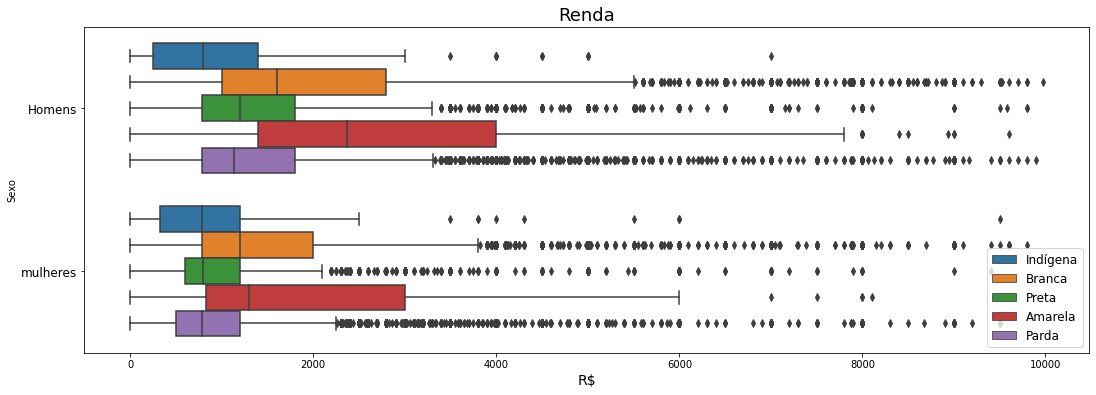

In [28]:
ax = sns.boxplot( x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), hue = 'Cor',  orient = 'h')
ax.figure.set_size_inches(18, 6)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_yticklabels(['Homens', 'mulheres'], fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)
ax

Podemos notar em todos os casos a disparidade de salários entre homens e mulheres, na enorme maioria dos casos os homens tem rendas maiores. E entre as cores, uma superioridade para brancos e amarelos.

#Obter o valor máximo ganho por 99% das pessoas do dataset

In [29]:
dados.Renda.quantile(q=0.99).max()

15000.0

#Box plot da renda categorizada por Estados, filtrando as rendas abaixo de R$ 10000,00

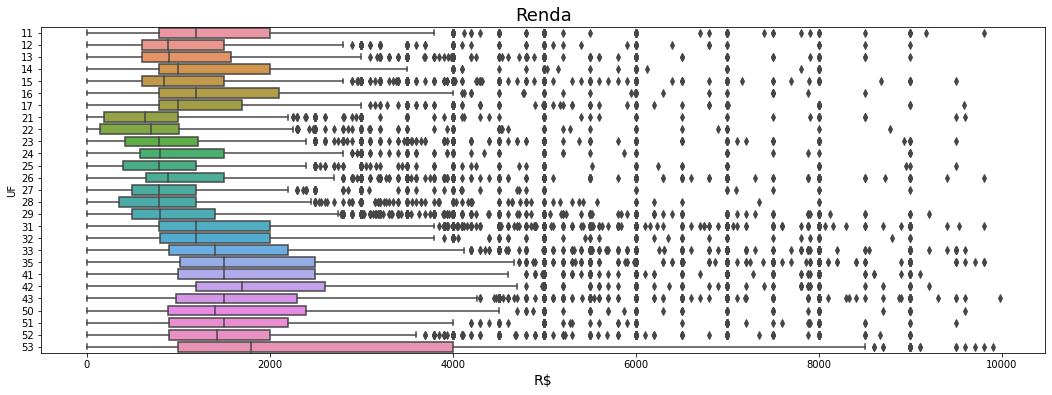

In [30]:
ax = sns.boxplot( x = 'Renda', y = 'UF', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(18, 6)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax